<a href="https://colab.research.google.com/github/Shivu1414/CodeClause_Task1_Stock_Market_Prediction/blob/main/Stock_Market_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
pip install chart_studio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Importing Libraries

In [47]:
from ast import increment_lineno
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [26]:
#Read CSV file
tesla= pd.read_csv('tesla.csv')
tesla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,29-06-2010,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,30-06-2010,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,01-07-2010,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,02-07-2010,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,06-07-2010,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [27]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2193 non-null   object 
 1   Open       2193 non-null   float64
 2   High       2193 non-null   float64
 3   Low        2193 non-null   float64
 4   Close      2193 non-null   float64
 5   Adj Close  2193 non-null   float64
 6   Volume     2193 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 120.1+ KB


In [28]:
tesla['Date']=pd.to_datetime(tesla['Date'])

<ipython-input-28-46707f19ca4d>:1: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



In [29]:
print(f'Dateframe contains stock prices between {tesla.Date.min()} {tesla.Date.max()}')
print(f'Tatal days = {(tesla.Date.max()- tesla.Date.min())} days')

Dateframe contains stock prices between 2010-01-07 00:00:00 2019-12-03 00:00:00
Tatal days = 3617 days 00:00:00 days


In [30]:
tesla.sort_values(by='Date', ascending=True, inplace=True)
tesla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
2,2010-01-07,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
45,2010-01-09,19.620001,20.690001,19.600000,20.450001,20.450001,494900
66,2010-01-10,20.690001,20.750000,20.309999,20.600000,20.600000,597700
87,2010-01-11,21.940001,22.750000,21.309999,21.410000,21.410000,455800
108,2010-01-12,35.869999,36.419998,33.450001,34.349998,34.349998,1299200


In [31]:
tesla.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2.193000e+03
mean,175.652882,178.710262,172.412075,175.648555,175.648555,5.077449e+06
std,115.580903,117.370092,113.654794,115.580771,115.580771,4.545398e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,33.110001,33.910000,32.459999,33.160000,33.160000,1.577800e+06
50%,204.990005,208.160004,201.669998,204.990005,204.990005,4.171700e+06
75%,262.000000,265.329987,256.209991,261.739990,261.739990,6.885600e+06
max,386.690002,389.609985,379.350006,385.000000,385.000000,3.716390e+07


<Axes: >

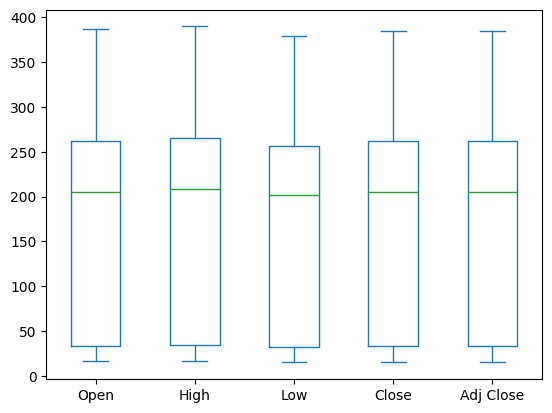

In [32]:
tesla[['Open', 'High', 'Low', 'Close', 'Adj Close']].plot(kind='box')

In [33]:
#Setting the layout for our plot
layout=go.Layout(
    title='Stock Prices of Tesla',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New , monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New , monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

tesla_data=[{'x':tesla['Date'], 'y':tesla['Close']}]
plot = go.Figure(data=tesla_data,layout=layout)

In [34]:
#Plotting offline
iplot(plot)

In [35]:
#Building the regression model
from sklearn.model_selection import train_test_split

#For preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#For model evaluation
from sklearn.metrics import mean_squared_error as mse 
from sklearn.metrics import r2_score

In [36]:
#Split the data into train and test sets
X=np.array(tesla.index).reshape(-1,1)
Y=tesla['Close']
X_train, X_test,Y_train, Y_test=train_test_split(X,Y,test_size=0.3, random_state=101)

In [37]:
#Feature scaling
scaler=StandardScaler().fit(X_train)

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
#Creating a linear model
lm=LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression()

In [40]:
#Plot actual and predicted values for train dataset
trace0=go.Scatter(
    x=X_train.T[0],
    y=Y_train,
    mode='markers',
    name='Actual'
)
trace1=go.Scatter(
    x=X_train.T[0],
    y=lm.predict(X_train).T,
    mode='lines',
    name='Predicted'
)
tesla_data=[trace0,trace1]
layout.xaxis.title.text='Day'
plot2=go.Figure(data=tesla_data,layout=layout)

In [41]:
iplot(plot2)

In [42]:
#Calculate scores for model evaluation
scores= f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, lm.predict(X_train))}\t{r2_score(Y_test, lm.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train,lm.predict(X_train))}\t{mse(Y_test,lm.predict(X_test))}
'''

print(scores)


Metric           Train                Test        
r2_score  0.8658698653844746	0.8611617962050295
MSE       1816.540371681398	1790.9783417267101

